21MIS1152- Rajeev Sekar

Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('car.data', header=None, names=col_names)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [2]:
# Get a summary of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


DATA PREPROCESSING: no null values in dataset, featured are encoded

In [4]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.apply(LabelEncoder().fit_transform)
df_encoded.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


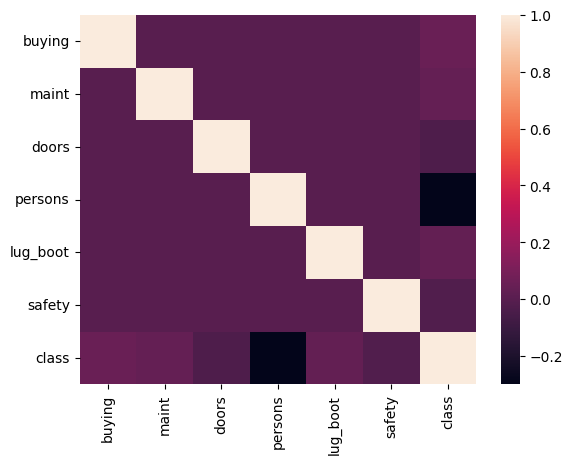

In [5]:
import matplotlib.pyplot as mp  
import seaborn as sb 

# plotting correlation heatmap 
dataplot=sb.heatmap(df_encoded.corr()) 
  
# displaying heatmap 
mp.show() 

From the above heatmap, we can see that no 2 independent variables are correlated to each other => Naive bayes can be applied

In [29]:
#Splitting dataset into train and test sets

X = df_encoded.drop(['class'],axis=1).values
y = df_encoded['class'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =
0.3)

MODEL TRAINING

In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [31]:
#Predicting the Test set results
y_pred = model.predict(X_test)

MODEL EVALUATION using confusion matrix and classification report

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 15,   1,  37,  61],
       [  6,   0,   7,   8],
       [  4,   0, 302,  62],
       [  0,   0,   0,  16]])

In [33]:
import warnings
warnings.filterwarnings('always')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.13      0.22       114
           1       0.00      0.00      0.00        21
           2       0.87      0.82      0.85       368
           3       0.11      1.00      0.20        16

    accuracy                           0.64       519
   macro avg       0.40      0.49      0.31       519
weighted avg       0.75      0.64      0.65       519

